In [29]:
import numpy as np
import time

n=10
p = 0.1
t = 

In [84]:
def binomial_cdf (n,p):
    """
    based on the trick for binomial distribution: p_{k+1} = p_k * (n-k)/(k+1) * p/(1-p)
    """

    coef = p/(1-p) # coefficient 
    u = np.random.uniform() # extract a value of CDF
    if p<=0.5:
        pr = (1-p)**n # probability of zero successes
        F = pr # CDF for zero successes
        rand = 0 # start from k=0
        while u>=F:
            pr *= coef*(n-rand)/(rand+1)
            F += pr
            rand += 1
    else:
        u = np.random.uniform()
        pr = p**n # probability of zero failures
        F = 1 # CDF for zero failures
        rand = n # start from k=n
        while u<F:
            pr *= rand/(n-rand+1)/coef
            F -= pr
            rand -= 1
            #if rand == 0: break
    return rand

In [89]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n = [100, 1000]
t = np.zeros((len(n), len(p)), dtype = np.float64)

size = 10000
for i in range(len(n)):
    for j in range(len(p)):
        print( "n = %d, p = %.2f" % (n[i], p[j]))
        np.random.seed(0)
        t0 = time.time()
        for s in range(size):
            rand = binomial_cdf(n[i], p[j])
        t[i,j] = (time.time() - t0)/size
np.savetxt('results/binomial_cdf_time.txt', t)

n = 100, p = 0.10
n = 100, p = 0.20
n = 100, p = 0.30
n = 100, p = 0.40
n = 100, p = 0.50
n = 100, p = 0.60
n = 100, p = 0.70
n = 100, p = 0.80
n = 100, p = 0.90
n = 1000, p = 0.10
n = 1000, p = 0.20
n = 1000, p = 0.30
n = 1000, p = 0.40
n = 1000, p = 0.50
n = 1000, p = 0.60
n = 1000, p = 0.70
n = 1000, p = 0.80
n = 1000, p = 0.90


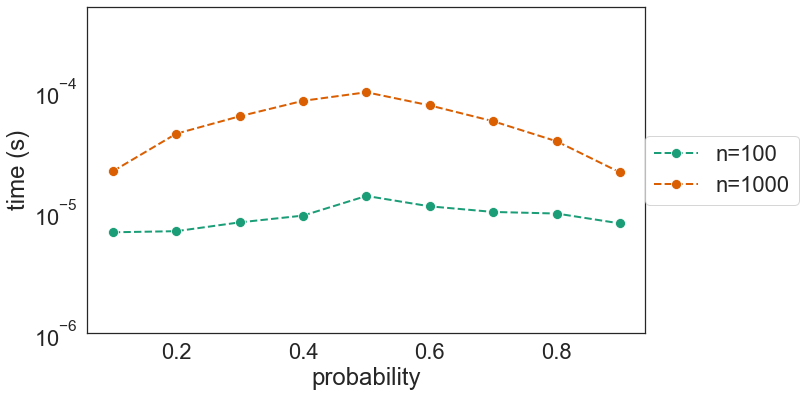

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
lw=2
ms=10
ls = '--'
m = 'o'
col = 0  
t = pd.read_csv('results/binomial_cdf_time.txt', header=None, delim_whitespace=True)
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='white',palette='Dark2',font_scale=2)
for i in range(len(t.index)):
        g=sns.lineplot(x=p, y=t.iloc[i,:], ax=ax, linewidth=lw, markersize=ms, linestyle=ls,
                    marker=m, label='n={}'.format(n[i]))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.)
ax.set_ylabel('time (s)')
ax.set_xlabel('probability')
ax.set_yscale('log')
ax.set_ylim(1e-6, 0.5*1e-3)
fig.savefig('results/binomial_time_cdf.pdf', bbox_inches='tight')
